<a href="https://colab.research.google.com/github/ChideraFrancisca/Customers_transaction_project/blob/main/Customers_transaction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
#load data from csv file
transactions_data = pd.read_csv("transactions_data.csv")
transactions_data.head()

,customer,accountid,AMOUNT_LCY,Trans_ID,Trans_timestamp,deb_cre_ind,narrative,transactiondescription
0,18354812,19888479,321685.00,FT202730YK10,2020-09-29 10:16:04.000,C,CHOICE INTERNATIONAL FORWARDING NIG?EMEKA LINU...,TRANSFER IN
1,12174614,16476167,1555.40,FT202661P8Q7,2020-09-22 15:47:31.000,C,BANK?NIP From 11000720092216005928289544?8107 ...,TRANSFER IN
2,13975321,15133256,331922.37,FT20274MBLN1,2020-09-30 15:05:40.997,C,BANK]SEPTEMBER SALARY 030202093421349,TRANSFER IN
3,13268397,13323967,28280.00,FT20266W5M7H,2020-09-22 07:30:57.000,C,BANK?NIP From 00001420092208270929929956?7597 ...,TRANSFER IN
4,11773959,14430794,363398.00,FT20268S7T8C,2020-09-24 11:08:32.000,C,BANK?NIP From 00001520092411552900116649?4596 ...,TRANSFER IN


In [85]:
customers_data = pd.read_table('customers_data.csv')
customers_data.head()

,customer,accountid,workingbalance,openingdate,Restriciton Code,address,email_1,account_status,Maxtransdate,product_group_desc,customer_type,region,sector,card_status,onebank,onepay,ussd
0,15045151,14607892,88.01,2016-06-10,25,NaN,NaN,Dormant,2020-10-27,Savings Accounts Group,Individual Customer,APAPA & BEYOND,ADMIN AND SUPPORT SERVICE ACT.,NaN,0,0,0
1,16273893,11143214,25293.31,2016-10-28,NaN,"IJESHA, LAGOS",NaN,Active,2022-03-23,Savings Accounts Group,Individual Customer,APAPA & BEYOND,GENERAL,Active,0,0,1
2,17261366,15599591,3328.29,2016-09-22,19$23$25,AJEGUNLE AJEROMI,NaN,Dormant,2020-10-14,Savings Accounts Group,Individual Customer,APAPA & BEYOND,GENERAL,NaN,0,0,0
3,14006532,17841524,2110.85,2021-01-21,NaN,STOP KIRIKIRI TOWN,NaN,Active,2022-03-08,Current Accounts Group,Individual Customer,APAPA & BEYOND,GENERAL,NaN,0,0,0
4,19087216,11994865,88.01,2016-06-15,25,OLODI APAPA,NaN,Dormant,2020-10-20,Savings Accounts Group,Individual Customer,APAPA & BEYOND,ADMIN AND SUPPORT SERVICE ACT.,NaN,0,0,0


In [86]:
transactions_data.shape

(219843, 8)

In [87]:
customers_data.shape

(5000, 17)

In [88]:
transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219843 entries, 0 to 219842
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   customer                219843 non-null  int64  
 1   accountid               219843 non-null  int64  
 2   AMOUNT_LCY              219843 non-null  float64
 3   Trans_ID                215189 non-null  object 
 4   Trans_timestamp         219843 non-null  object 
 5   deb_cre_ind             219843 non-null  object 
 6   narrative               219249 non-null  object 
 7   transactiondescription  219842 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 13.4+ MB


In [110]:
df = pd.merge(transactions_data, customers_data, how='inner', on=['accountid'])
df.head()

,customer_x,accountid,AMOUNT_LCY,Trans_ID,Trans_timestamp,deb_cre_ind,narrative,transactiondescription,customer_y,workingbalance,...,account_status,Maxtransdate,product_group_desc,customer_type,region,sector,card_status,onebank,onepay,ussd
0,14090403,11542643,56560.0,FT20266S4D4W,2020-09-22 18:07:10.000,C,BANK?NIP From 00001320092218530000017517?1020 ...,TRANSFER IN,14090403,496861.36,...,Active,2022-03-23,Savings Accounts Group,Individual Customer,APAPA & BEYOND,GENERAL,NaN,0,1,0
1,14090403,11542643,1414000.0,FT20267ZP1P9,2020-09-23 10:25:15.000,C,BANK?NIP From 00000820092311052357308071?0001 ...,TRANSFER IN,14090403,496861.36,...,Active,2022-03-23,Savings Accounts Group,Individual Customer,APAPA & BEYOND,GENERAL,NaN,0,1,0
2,14090403,11542643,1414000.0,FT20272GD8NG,2020-09-27 19:04:04.000,C,BANK?NIP From 00000820092719594915312839?0001 ...,TRANSFER IN,14090403,496861.36,...,Active,2022-03-23,Savings Accounts Group,Individual Customer,APAPA & BEYOND,GENERAL,NaN,0,1,0
3,14090403,11542643,1414000.0,FT20267SBKG9,2020-09-23 15:42:29.000,D,NIBSS INSTANT PAYMENT TSS?Online to GTBank Plc...,TRF :,14090403,496861.36,...,Active,2022-03-23,Savings Accounts Group,Individual Customer,APAPA & BEYOND,GENERAL,NaN,0,1,0
4,14090403,11542643,70700.0,FT20268JMF32,2020-09-24 16:44:11.000,D,NIBSS INSTANT PAYMENT TSS?Online to First Bank...,TRF :,14090403,496861.36,...,Active,2022-03-23,Savings Accounts Group,Individual Customer,APAPA & BEYOND,GENERAL,NaN,0,1,0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25518 entries, 0 to 25517
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_x              21387 non-null  float64
 1   accountid               25518 non-null  int64  
 2   AMOUNT_LCY              21387 non-null  float64
 3   Trans_ID                20998 non-null  object 
 4   Trans_timestamp         21387 non-null  object 
 5   deb_cre_ind             21387 non-null  object 
 6   narrative               21387 non-null  object 
 7   transactiondescription  21387 non-null  object 
 8   customer_y              25518 non-null  int64  
 9   workingbalance          25518 non-null  float64
 10  openingdate             25518 non-null  object 
 11  Restriciton Code        4550 non-null   object 
 12  address                 23617 non-null  object 
 13  email_1                 11184 non-null  object 
 14  account_status          25518 non-null

In [91]:
df.shape

(25518, 24)

In [92]:
df.describe()

,customer_x,accountid,AMOUNT_LCY,customer_y,workingbalance,onebank,onepay,ussd
count,2.138700e+04,2.551800e+04,2.138700e+04,2.551800e+04,2.551800e+04,25518.000000,25518.000000,25518.000000
mean,1.518561e+07,1.512650e+07,1.602714e+05,1.515788e+07,3.132732e+05,0.343953,0.532604,0.618622
std,2.905993e+06,2.944577e+06,2.036780e+06,2.908078e+06,1.273427e+07,0.475035,0.498946,0.485735
min,1.000006e+07,1.000002e+07,3.000000e-02,1.000006e+07,-1.972557e+09,0.000000,0.000000,0.000000
25%,1.254802e+07,1.254639e+07,2.828000e+03,1.254802e+07,1.700375e+02,0.000000,0.000000,0.000000
50%,1.535748e+07,1.505586e+07,8.484000e+03,1.532902e+07,5.128690e+03,0.000000,1.000000,1.000000
75%,1.766264e+07,1.781636e+07,2.828000e+04,1.764760e+07,6.663581e+04,1.000000,1.000000,1.000000
max,1.997501e+07,1.999780e+07,1.414000e+08,1.999880e+07,1.020330e+08,1.000000,1.000000,1.000000


In [93]:
df.isnull().sum()

,0
customer_x,4131
accountid,0
AMOUNT_LCY,4131
Trans_ID,4520
Trans_timestamp,4131
deb_cre_ind,4131
narrative,4131
transactiondescription,4131
customer_y,0
workingbalance,0


In [94]:
df.dropna(axis =0, inplace=True)
df.isnull().sum()

,0
customer_x,0
accountid,0
AMOUNT_LCY,0
Trans_ID,0
Trans_timestamp,0
deb_cre_ind,0
narrative,0
transactiondescription,0
customer_y,0
workingbalance,0


In [95]:
df.nunique()

,0
customer_x,30
accountid,30
AMOUNT_LCY,96
Trans_ID,284
Trans_timestamp,285
deb_cre_ind,2
narrative,235
transactiondescription,9
customer_y,30
workingbalance,30


In [107]:
df.shape

(285, 24)

In [96]:
df["sector"].value_counts()

,count
sector,
GENERAL,269
GENERAL COMMERCE,10
AGRICULTURE,4
OIL AND GAS,1
EDUCATION,1


In [97]:
df['region'].value_counts()

,count
region,
APAPA & BEYOND,285


In [98]:
df['customer_type'].value_counts()

,count
customer_type,
Individual Customer,252
Youth Corper,10
Minor,9
Enterprise Customer,6
Salary Customer,3
MSME,3
Corporate Customer,2


In [99]:
df['account_status'].value_counts()

,count
account_status,
Inactive,167
Dormant,106
Active,12


In [100]:
df['deb_cre_ind'].value_counts()

,count
deb_cre_ind,
D,213
C,72


In [101]:
df['product_group_desc'].value_counts()

,count
product_group_desc,
Savings Accounts Group,241
Current Accounts Group,44


In [102]:
df['onebank'].value_counts()

,count
onebank,
0,249
1,36


In [103]:
df['ussd'].value_counts()

,count
ussd,
1,172
0,113


In [104]:
df['onepay'].value_counts()

,count
onepay,
1,175
0,110


In [105]:
df['transactiondescription'].value_counts()

,count
transactiondescription,
TRF :,119
TRANSFER IN,67
CASH WITHDRAWAL,41
POINT OF SALE PURCHASE,30
BILL PYMNT-FUNDS TRANSFER,11
TRANSFER OUT,9
AA LOAN REPAYMENT,5
DEPOSIT WITHDRAWAL (TRANSFER),2
NEFT CREDITS,1


In [106]:
df['card_status'].value_counts()

,count
card_status,
Active,250
Expired,22
Restricted,13


In [129]:
customer_type = pd.crosstab(df['customer_type'],df['account_status'])
customer_type

account_status,Active,Dormant,Inactive
customer_type,,,
Corporate Customer,775,55,87
DSE,8,0,0
EMBASSY/HIGH COMMISSION,1,0,4
Enterprise Customer,342,3,0
Individual Customer,16741,448,425
Individual Staff,352,0,0
Internal Customer,86,0,0
Joint Customers,0,0,4
MSME,221,7,0


In [136]:
customers_transactions = pd.crosstab(df['customer_type'],df['transactiondescription'])
customers_transactions

transactiondescription,AA LOAN REPAYMENT,ACCOUNTS TRANSFER,BILL PYMNT-FUNDS TRANSFER,CASH WITHDRAWAL,CASH WITHDRAWAL FOREIGN CCY,CASH WITHDRAWAL(LOCAL CCY),CHEQUE,CHEQUE DEPOSIT (INHOUSE),CREDIT ARRANGEMENT,DEPOSIT CASH (LOCAL CURRENCY),DEPOSIT WITHDRAWAL (TRANSFER),DRAFT COMMISSION + VAT,ETRANZACT PAYMENT,NEFT CREDITS,OUTWARD CHEQUE PAYMENT,POINT OF SALE PURCHASE,STANDING ORDER,TRANSFER IN,TRANSFER OUT,TRF :
customer_type,,,,,,,,,,,,,,,,,,,,
Corporate Customer,0,0,34,108,1,15,0,0,0,29,0,2,1,1,2,18,0,190,78,438
DSE,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0
EMBASSY/HIGH COMMISSION,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,2
Enterprise Customer,0,0,33,92,0,2,0,0,0,2,0,0,0,0,0,17,0,127,7,65
Individual Customer,31,8,1122,2924,1,4,1,5,0,185,2,0,97,51,0,1995,1,3948,90,7149
Individual Staff,9,0,5,19,0,0,0,0,1,1,1,0,0,0,0,39,0,61,35,181
Internal Customer,0,0,0,0,0,3,1,0,0,50,0,0,0,0,0,0,11,8,1,12
Joint Customers,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0
MSME,0,0,0,0,0,5,0,1,0,12,0,0,0,1,22,0,0,78,45,64


In [137]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=customers_transactions)

https://docs.google.com/spreadsheets/d/1d19i0rFjba2KPmN_tXzZHag0IqxETY5ZUl4X3Fg6qyY#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


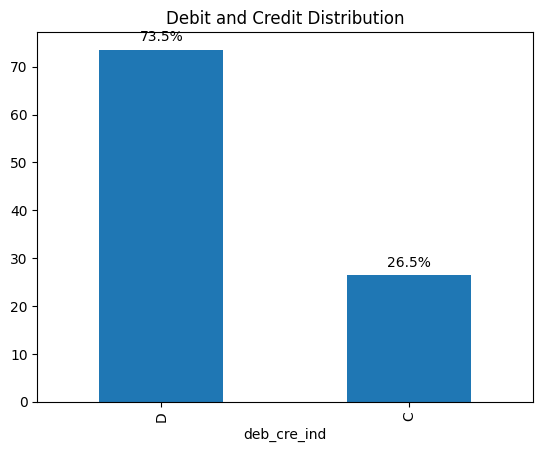

In [140]:
Debit_credit = df['deb_cre_ind'].value_counts(normalize=True)*100
ax = Debit_credit.plot(kind='bar')

plt.title('Debit and Credit Distribution')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

**73.25% of the transactions were debits while 26.5% are credits, this implies that money leaves the bank's customers account more than it comes in. **

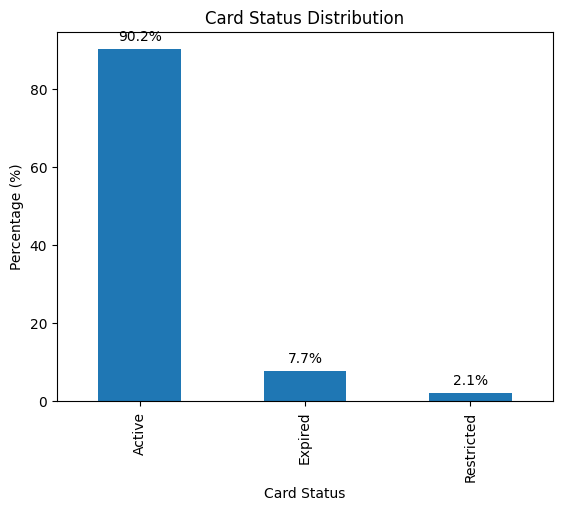

In [114]:
import matplotlib.pyplot as plt

# Calculate the percentage of each 'card_status' value
card_status_percentages = df['card_status'].value_counts(normalize=True) * 100

# Plot the bar chart
ax = card_status_percentages.plot(kind='bar')

# Add title and labels
plt.title('Card Status Distribution')
plt.xlabel('Card Status')
plt.ylabel('Percentage (%)')

# Display percentages on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Show the plot
plt.show()


**90.2% of the customers have active cards, 7.7% have expired cards and are yet to renew it while the other 2.1% have been restricted from using their cards.**

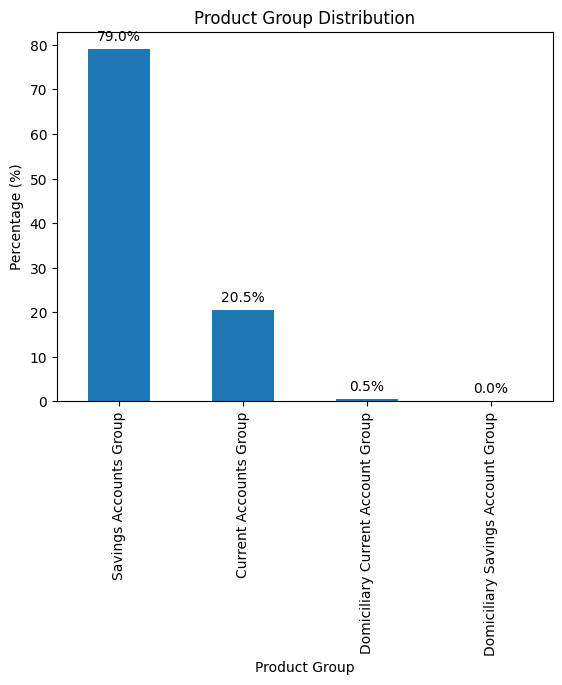

In [118]:
product_group_desc_percentages= df['product_group_desc'].value_counts(normalize = True)*100
ax = product_group_desc_percentages.plot(kind='bar')

plt.title('Product Group Distribution')
plt.xlabel('Product Group')
plt.ylabel('Percentage (%)')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()


**Majority of the bank's customers (79.9%) use a savings account,20.5% of them opened a current acount and only 0.5% have a savings domicillary (dollar) account.**

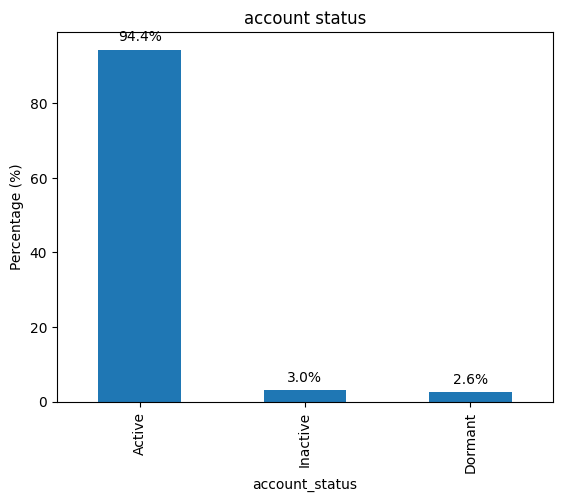

In [124]:
account_status= df['account_status'].value_counts(normalize = True)*100
ax = account_status.plot(kind='bar')

plt.title('account status')
plt.ylabel('Percentage (%)')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

**94.4% of the accounts in the bank are active, 3.0% of them are inactive, while 2.6% are dormant.**

<Axes: xlabel='region'>

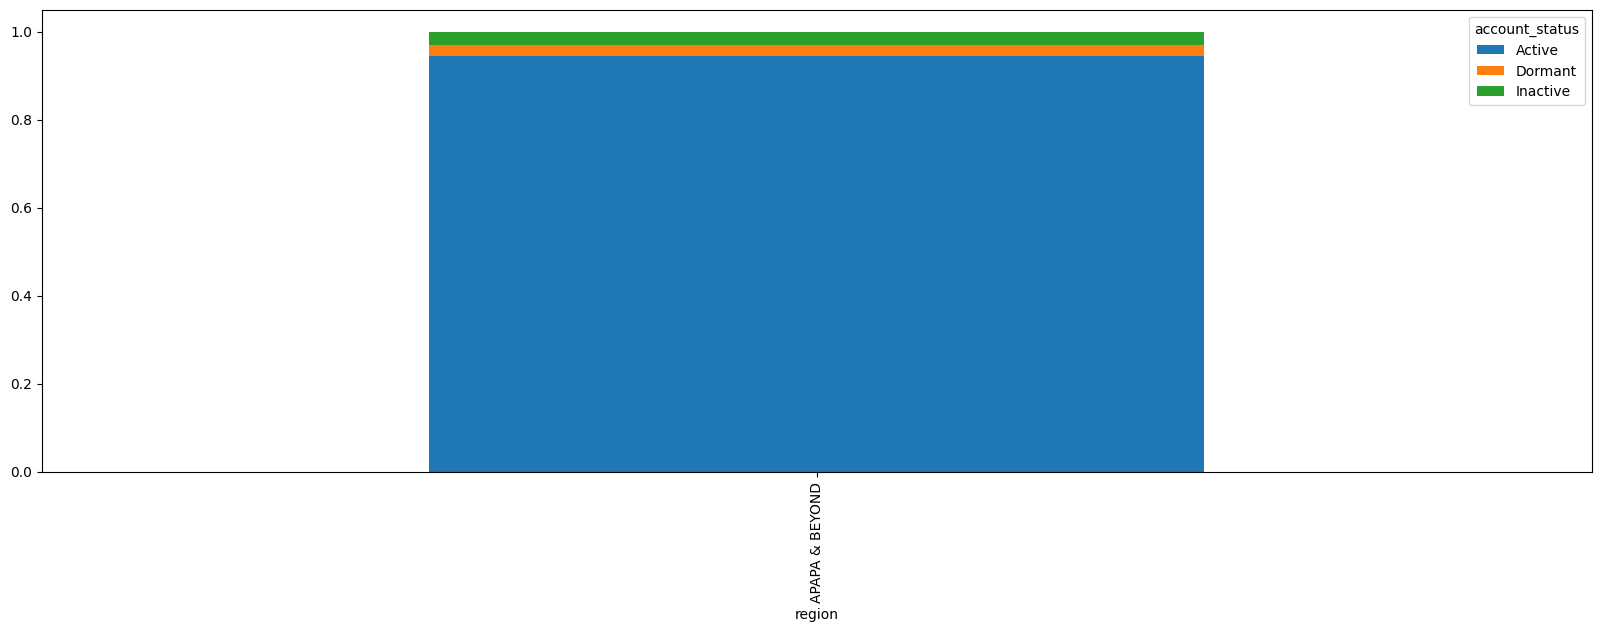

In [122]:
region = pd.crosstab(df['region'],df['account_status'])
region.div(region.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(20,6))

**The dataset contains information from only the Apapa region of the bank.**

<Axes: xlabel='card_status'>

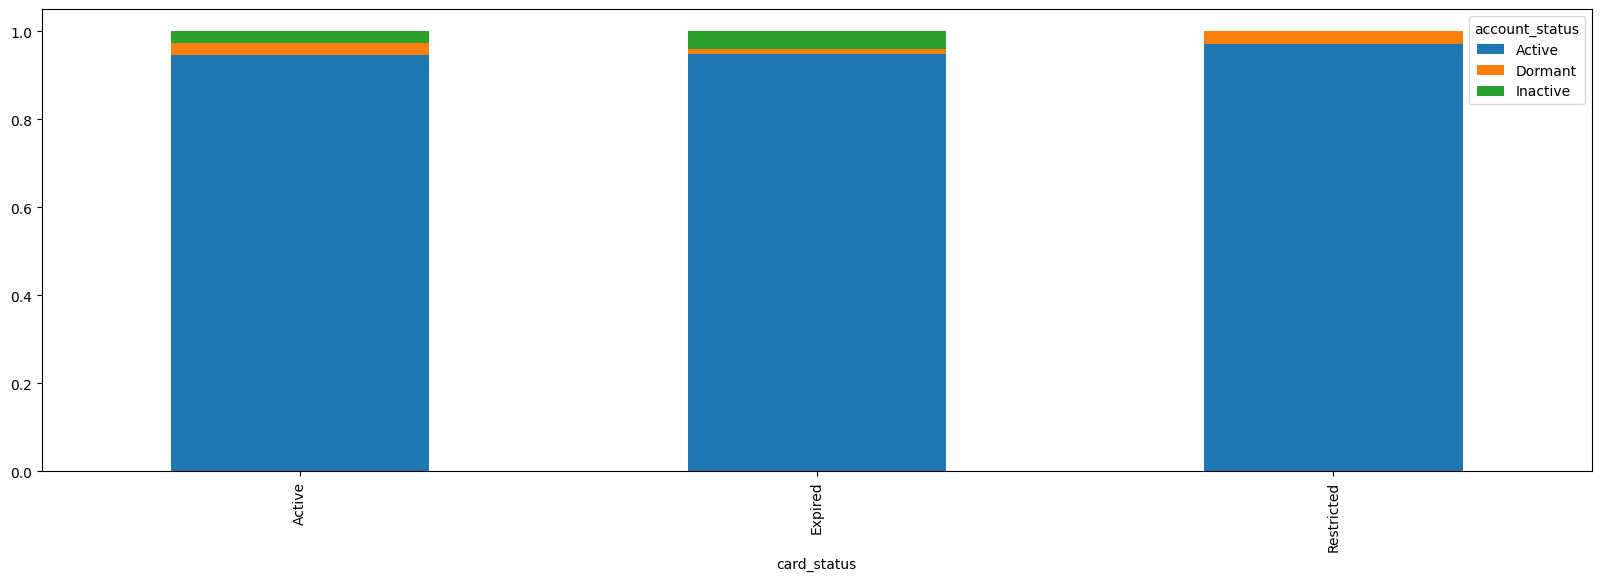

In [130]:
card_status = pd.crosstab(df['card_status'],df['account_status'])
card_status.div(card_status.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(20,6))

<Axes: xlabel='onebank'>

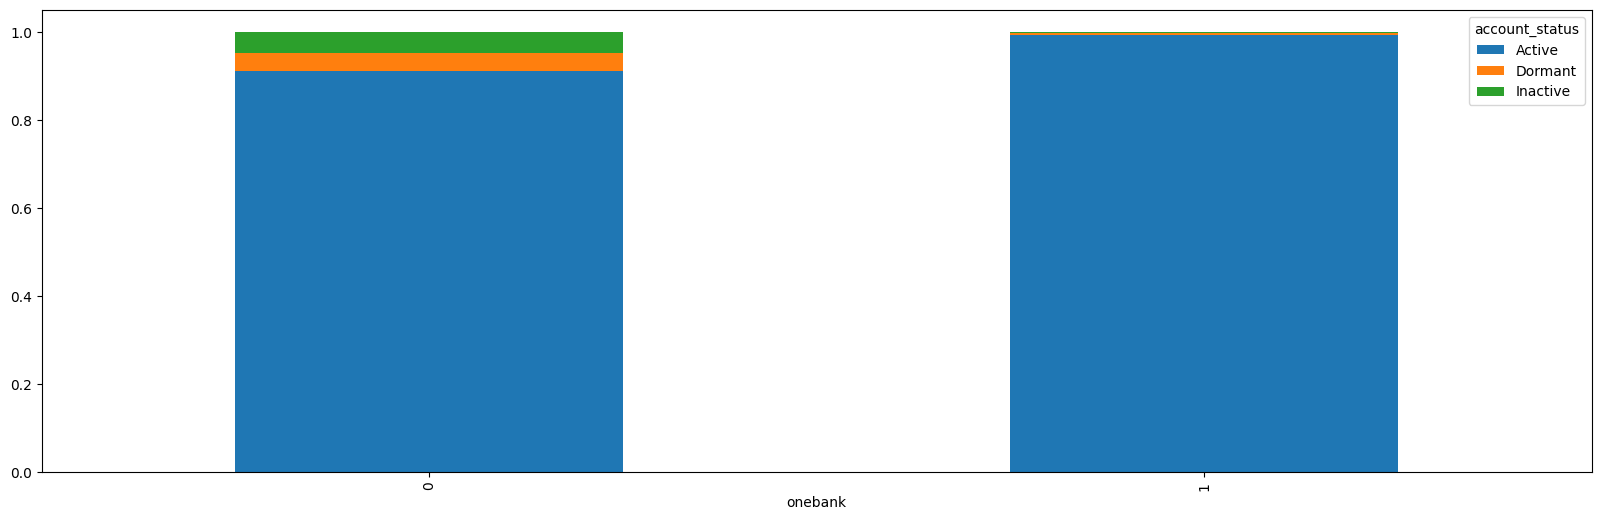

In [131]:
onebank = pd.crosstab(df['onebank'],df['account_status'])
onebank.div(onebank.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(20,6))

<Axes: xlabel='onepay'>

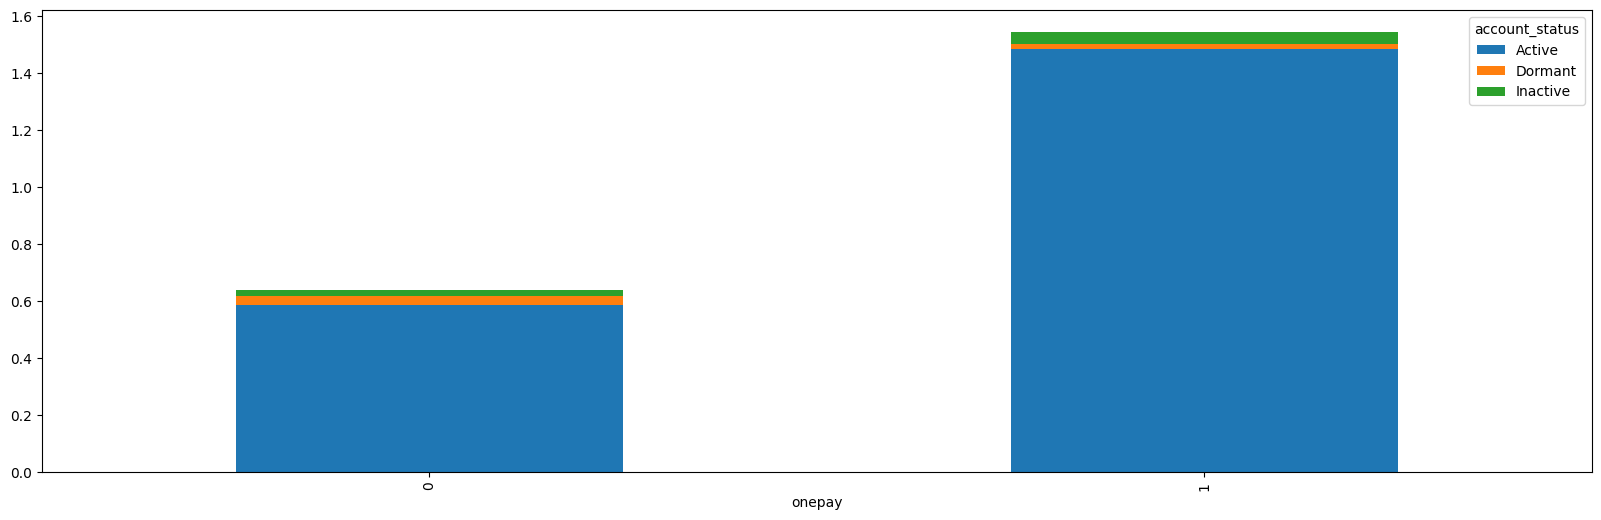

In [132]:
one_pay= pd.crosstab(df['onepay'],df['account_status'])
one_pay.div(onebank.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(20,6))

<Axes: xlabel='ussd'>

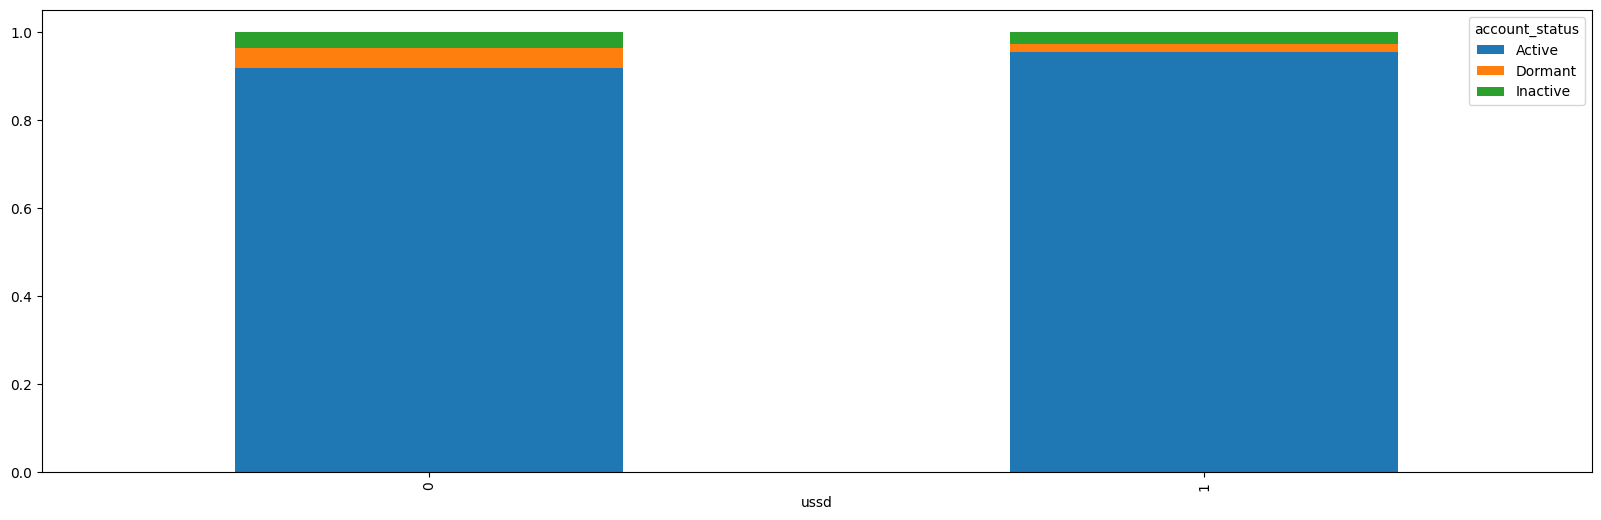

In [134]:
ussd = pd.crosstab(df['ussd'],df['account_status'])
ussd.div(ussd.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(20,6))

**RECOMMENDATIONS**

*   The customers with inactive accounts should be reached out to either via text messages or E-mail,this could make them re-activate their accounts.
*   Advertisements such as Google Ads and radio/television jingles on the importance of having a domicillary account should be done. This could increase the percentage of domicillary accounts opened by the bank's customers.

